                                                        Lab | Cleaning numerical data

Context: An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

1- Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', None)


2- Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

3- First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

In [3]:
customer_df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4- Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [6]:
def standardise_column_names(df):
    for columns in df.columns:
        c_low = columns.lower()
        c_standard = '_'.join(c_low.split(' '))
        df.rename({columns: c_standard}, inplace=True, axis=1)
    return df

customer_df = standardise_column_names(customer_df)
customer_df.head()

customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income location_code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   months_since_policy_inception  number_of_open_complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   number_of_policies     policy_type        policy renew_offer_type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  sales_channel  total_claim_amount  vehicle_class vehicle_size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

5- Change effective to date column to datetime format.

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format= '%m/%d/%y')
customer_df

customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  \
0     Bachelor        2011-02-24         Employed      F   56274   
1     Bachelor        2011-01-31       Unemployed      F       0   
2     Bachelor        2011-02-19         Employed      F   48767   
3     Bachelor        2011-01-20       Unemployed      M       0   
4     Bachelor        2011-02-03         Employed      M   43836   
...        ...               ...              ...    ...     ...   
9129  Bachelor        2011-02-10         Employed      M   71941   
9130   College        2011-02-12         Employed      F   21604   
9131  Bachelor        2011-02-06       Unemployed      M       0   
9132   College        2011-02-03         Employed      M   21941   
9133   College        2011-02-14       Unemployed      M       0   

     location_code marital_status  monthly_premium_auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies     policy_type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0                   1 

6- Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [8]:
numerical_df=customer_df.select_dtypes('number')
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


7- Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [9]:
# I choose to define discrete variables as numerical variables with less than 10 unique values:

def cont_disc_var(df):
    continuous= []
    discrete= []
    for columns in df.columns:
        num_unique= df[columns].nunique()
        if num_unique>10:
            continuous.append(columns)
        else:
            discrete.append(columns)
    return continuous, discrete

cont_disc_var(numerical_df)
    # seems like only 2 columns ('number_of_open_complaints' and 'number_of_policies') are considered discrete variables

(['customer_lifetime_value',
  'income',
  'monthly_premium_auto',
  'months_since_last_claim',
  'months_since_policy_inception',
  'total_claim_amount'],
 ['number_of_open_complaints', 'number_of_policies'])

In [10]:
# Creating the dfs:

continuous_df = numerical_df[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount']]
display(continuous_df.head())

discrete_df = numerical_df[['number_of_open_complaints', 'number_of_policies']]
display(discrete_df.head())
    #due to the few unique values that they contain, discrete variables can be considered as categorical variables
    #I won't be doing that for now because treating them as categorical would mean increasing the number of columns after encoding
    #and too many columns can lead to a poorly performing model, however it would be an option to test to try to improve the model later

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  total_claim_amount  
0                       32                              5          384.811147  
1                       13                             42         1131.464935  
2                       18                             38          566.472247  
3                       18                             65          529.881344  
4                       12                             44          138.130879

number_of_open_complaints  number_of_policies
0                          0                   1
1                          0                   8
2                          0                   2
3                          0                   7
4                          0                   1

8- Plot a correlation matrix, comment what you see.

Text(0.5, 1.0, 'Correlation Matrix')

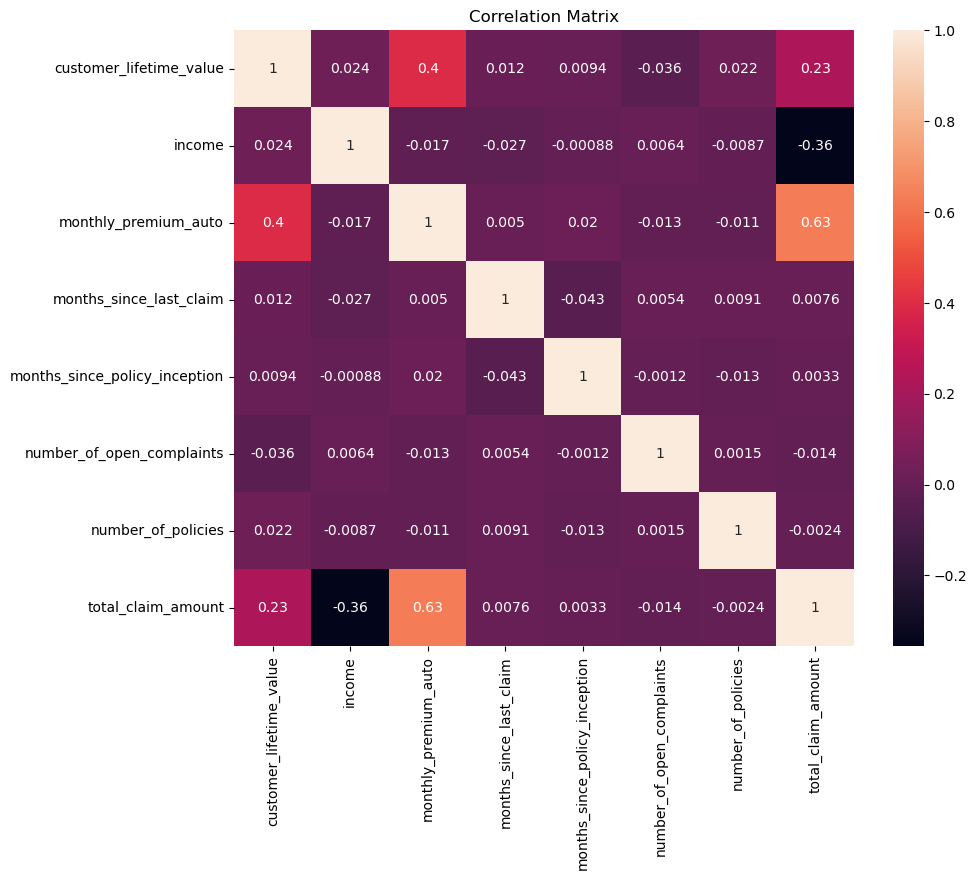

In [11]:
corr_matrix = numerical_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show
plt.title('Correlation Matrix')
    #there is a 'high' correlation between monthly_premium_auto and our target('total_claim_amount')
    #No noticeably high correlation (>0.85) between our features so we can keep them all

9- Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!). 
10- Comment what you can see in the plots.

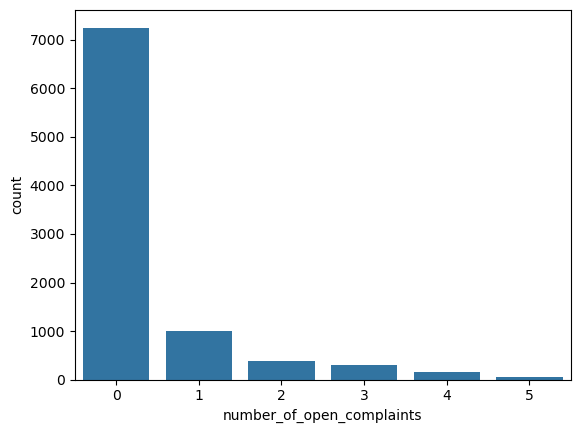

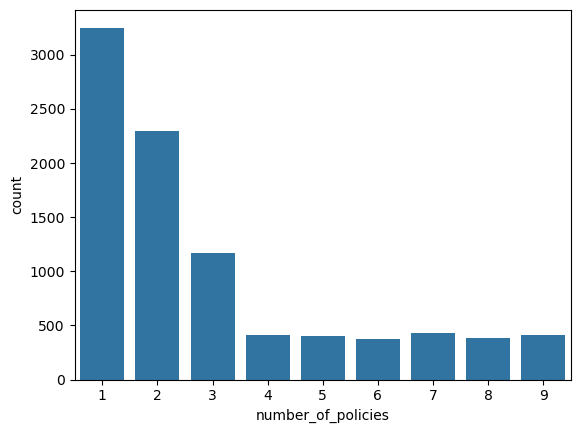

In [12]:
#I'll plot discrete variables using count plots while the continuous variables will be presented in histograms:

for columns in discrete_df:
    sns.countplot(x=discrete_df[columns], data=discrete_df)
    plt.show()

    #majority of customers have no open complaints and cumulate 1 or 2 of policies

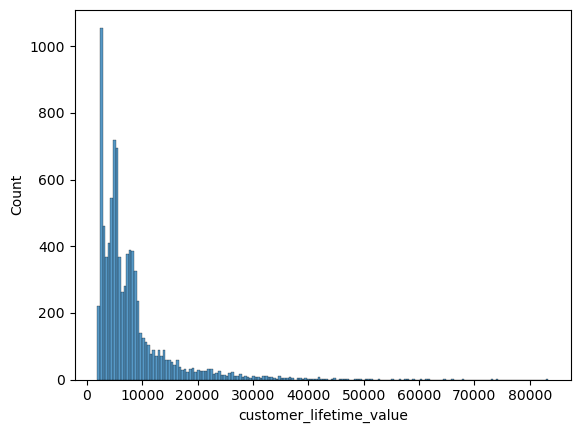

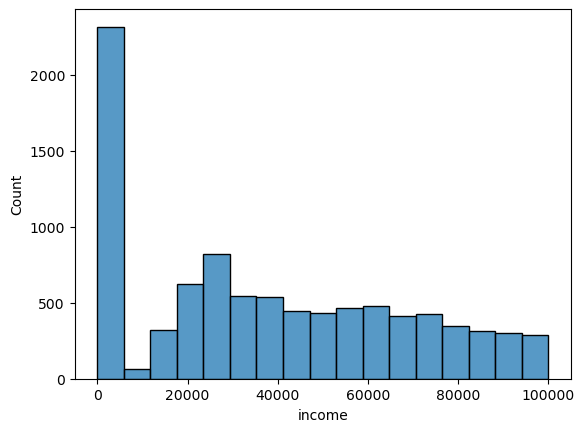

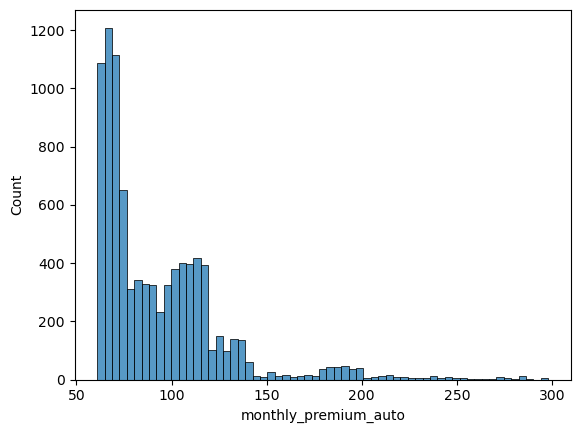

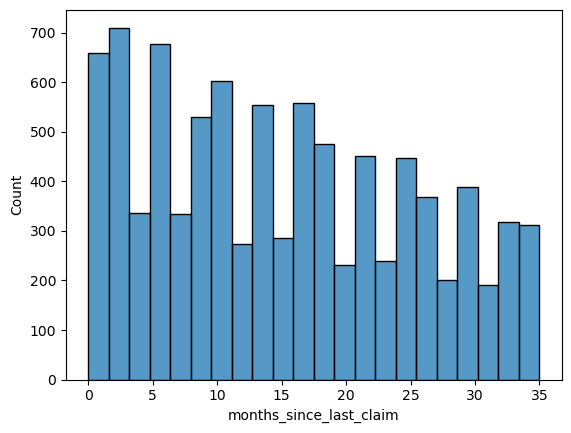

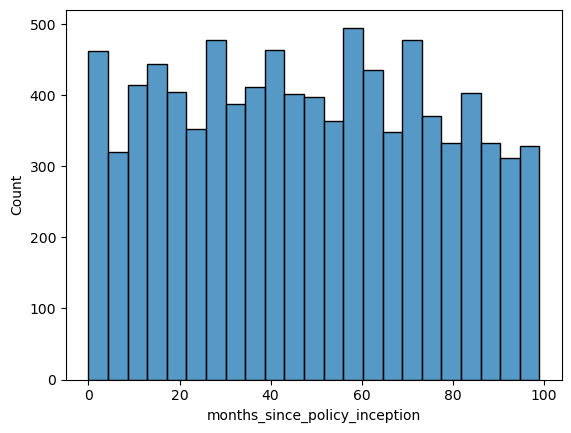

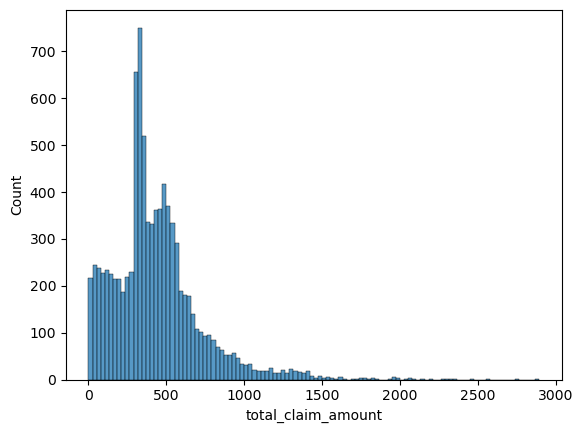

In [13]:
for columns in continuous_df:
    sns.histplot(continuous_df[columns])
    plt.show()

    #for customer_lifetime_value, monthly_premium_auto and total_claim_amount the distribution is quite skewed probably due to the presence of outliers
    #majority of customers are in the lower range of income

11- Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

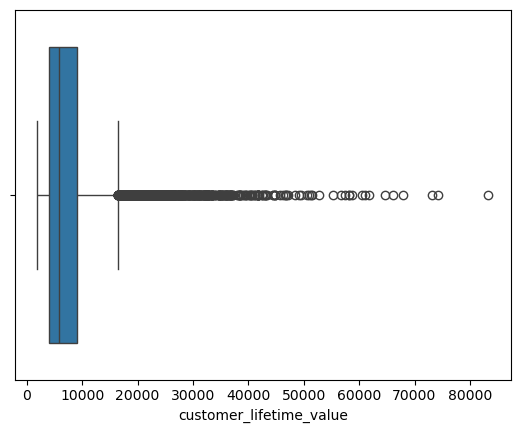

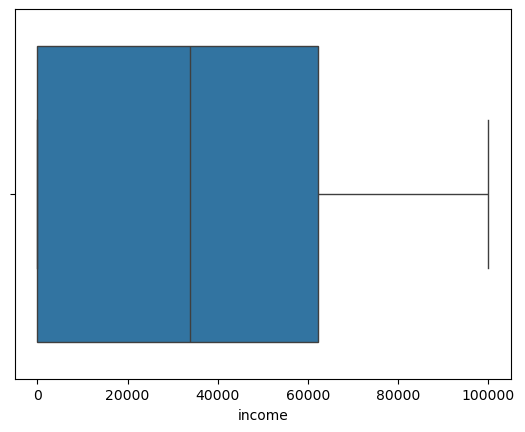

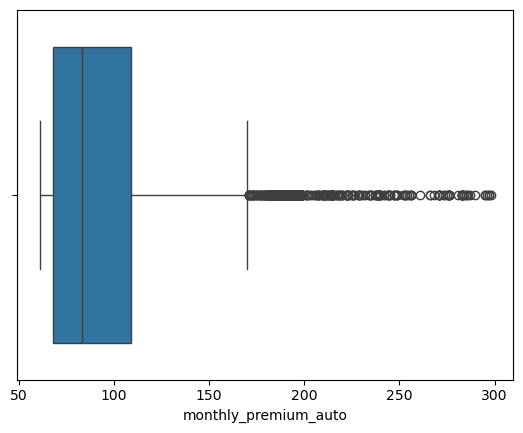

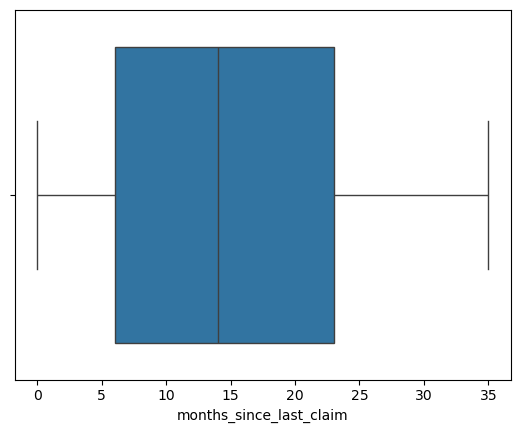

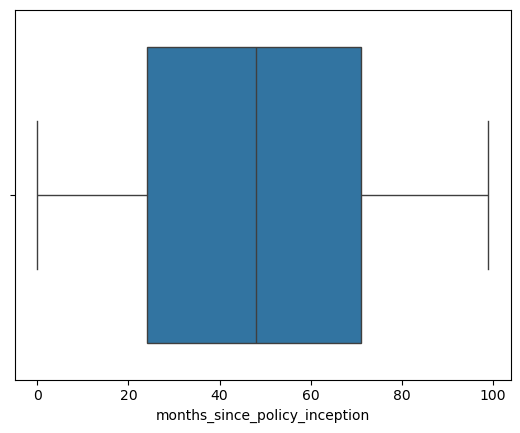

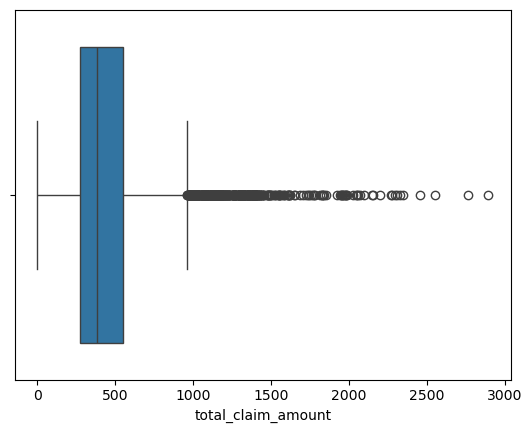

In [14]:
for columns in continuous_df:
    sns.boxplot(x=continuous_df[columns])
    plt.show()

#noticeable outliers in:
    # customer_lifetime_value > 80 000$
    # total_claim_amount with almost 3000$

12- Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

In [15]:
customer_df[customer_df['total_claim_amount']>= 2700 ]

customer    state  customer_lifetime_value response  coverage  \
888   BZ65376  Arizona              8581.278701       No  Extended   
5074  ZD75163   Nevada              9295.411150       No   Premium   

                 education effective_to_date employmentstatus gender  income  \
888               Bachelor        2011-01-18    Medical Leave      M   27689   
5074  High School or Below        2011-02-14       Unemployed      M       0   

     location_code marital_status  monthly_premium_auto  \
888       Suburban        Married                   239   
5074      Suburban         Single                   261   

      months_since_last_claim  months_since_policy_inception  \
888                         0                             72   
5074                       33                             44   

      number_of_open_complaints  number_of_policies     policy_type  \
888                           2                   1   Personal Auto   
5074                          0                   1  Corporate Auto   

            policy renew_offer_type sales_channel  total_claim_amount  \
888    Personal L2           Offer2           Web         2893.239678   
5074  Corporate L3           Offer4   Call Center         2759.794354   

     vehicle_class vehicle_size  
888     Luxury SUV      Medsize  
5074    Luxury Car      Medsize

In [16]:
customer_df[customer_df['customer_lifetime_value']> 70000 ]

customer       state  customer_lifetime_value response  coverage  \
1974  YC54142  Washington              74228.51604       No  Extended   
5716  FQ61281      Oregon              83325.38119       No  Extended   
6252  BP23267  California              73225.95652       No  Extended   

                 education effective_to_date employmentstatus gender  income  \
1974  High School or Below        2011-01-26       Unemployed      M       0   
5716  High School or Below        2011-01-31         Employed      M   58958   
6252              Bachelor        2011-02-09         Employed      F   39547   

     location_code marital_status  monthly_premium_auto  \
1974      Suburban         Single                   242   
5716      Suburban        Married                   231   
6252      Suburban        Married                   202   

      months_since_last_claim  months_since_policy_inception  \
1974                        1                             34   
5716                       31                             74   
6252                       11                             21   

      number_of_open_complaints  number_of_policies    policy_type  \
1974                          0                   2  Personal Auto   
5716                          0                   2  Personal Auto   
6252                          0                   2  Personal Auto   

           policy renew_offer_type sales_channel  total_claim_amount  \
1974  Personal L1           Offer1        Branch              1742.4   
5716  Personal L3           Offer1   Call Center              1108.8   
6252  Personal L3           Offer1        Branch               969.6   

     vehicle_class vehicle_size  
1974    Luxury Car      Medsize  
5716    Luxury Car        Small  
6252    Luxury SUV      Medsize

In [17]:
#to eliminate outliers, I would have to drop 5 rows out of 9134 rows which could be considered negligible (should end up with 9129 rows)
#keeping that in mmind I've decided to drop this rows

#removing from main dataframe:
customer_df = customer_df.drop(customer_df[customer_df['total_claim_amount']>= 2700 ].index).reset_index(drop=True)
customer_df = customer_df.drop(customer_df[customer_df['customer_lifetime_value']> 70000 ].index).reset_index(drop=True)
customer_df

#removing from numerical_df:
numerical_df = numerical_df.drop(numerical_df[numerical_df['total_claim_amount']>= 2700 ].index).reset_index(drop=True)
numerical_df = numerical_df.drop(numerical_df[numerical_df['customer_lifetime_value']> 70000 ].index).reset_index(drop=True)
numerical_df


customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9124             23405.987980   71941                    73   
9125              3096.511217   21604                    79   
9126              8163.890428       0                    85   
9127              7524.442436   21941                    96   
9128              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9124                       18                             89   
9125                       14                             28   
9126                        9                             37   
9127                       34                              3   
9128                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                             0                   1          384.811147  
1                             0                   8         1131.464935  
2                             0                   2          566.472247  
3                             0                   7          529.881344  
4                             0                   1          138.130879  
...                         ...                 ...                 ...  
9124                          0                   2          198.234764  
9125                          0                   1          379.200000  
9126                          3                   2          790.784983  
9127                          0                   3          691.200000  
9128                          0                   1          369.600000  

[9129 rows x 8 columns]

13- Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [18]:
numerical_df.isna().sum()
#there is no NaN values in our df so I'll keep it as is.

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

14- Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [19]:
#numerical_df.to_csv('numerical.csv', index=False)

                                                            Lab | Cleaning categorical data

1- Find all of the categorical data. Save it in a categorical_df variable.

In [20]:
categorical_df = customer_df.select_dtypes('object')
categorical_df

customer       state response  coverage education employmentstatus  \
0     BU79786  Washington       No     Basic  Bachelor         Employed   
1     QZ44356     Arizona       No  Extended  Bachelor       Unemployed   
2     AI49188      Nevada       No   Premium  Bachelor         Employed   
3     WW63253  California       No     Basic  Bachelor       Unemployed   
4     HB64268  Washington       No     Basic  Bachelor         Employed   
...       ...         ...      ...       ...       ...              ...   
9124  LA72316  California       No     Basic  Bachelor         Employed   
9125  PK87824  California      Yes  Extended   College         Employed   
9126  TD14365  California       No  Extended  Bachelor       Unemployed   
9127  UP19263  California       No  Extended   College         Employed   
9128  Y167826  California       No  Extended   College       Unemployed   

     gender location_code marital_status     policy_type        policy  \
0         F      Suburban        Married  Corporate Auto  Corporate L3   
1         F      Suburban         Single   Personal Auto   Personal L3   
2         F      Suburban        Married   Personal Auto   Personal L3   
3         M      Suburban        Married  Corporate Auto  Corporate L2   
4         M         Rural         Single   Personal Auto   Personal L1   
...     ...           ...            ...             ...           ...   
9124      M         Urban        Married   Personal Auto   Personal L1   
9125      F      Suburban       Divorced  Corporate Auto  Corporate L3   
9126      M      Suburban         Single  Corporate Auto  Corporate L2   
9127      M      Suburban        Married   Personal Auto   Personal L2   
9128      M      Suburban         Single  Corporate Auto  Corporate L3   

     renew_offer_type sales_channel  vehicle_class vehicle_size  
0              Offer1         Agent   Two-Door Car      Medsize  
1              Offer3         Agent  Four-Door Car      Medsize  
2              Offer1         Agent   Two-Door Car      Medsize  
3              Offer1   Call Center            SUV      Medsize  
4              Offer1         Agent  Four-Door Car      Medsize  
...               ...           ...            ...          ...  
9124           Offer2           Web  Four-Door Car      Medsize  
9125           Offer1        Branch  Four-Door Car      Medsize  
9126           Offer1        Branch  Four-Door Car      Medsize  
9127           Offer3        Branch  Four-Door Car        Large  
9128           Offer4   Call Center   Two-Door Car      Medsize  

[9129 rows x 15 columns]

2- Check for NaN values and decide what to do with them, do it now.

In [21]:
categorical_df.isna().sum()
    #it doesn't seem like there's NaN values that will require being dealt with

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

3- Check all unique values of columns.

In [22]:
for columns in categorical_df.columns:
    print(categorical_df[columns].value_counts(dropna=False))
    print('')

customer
BU79786    1
IW56740    1
WW52683    1
XO38850    1
DB50188    1
          ..
DA28072    1
HS14476    1
YL91587    1
CT18212    1
Y167826    1
Name: count, Length: 9129, dtype: int64

state
California    3149
Oregon        2600
Arizona       1702
Nevada         881
Washington     797
Name: count, dtype: int64

response
No     7821
Yes    1308
Name: count, dtype: int64

coverage
Basic       5568
Extended    2738
Premium      823
Name: count, dtype: int64

education
Bachelor                2746
College                 2681
High School or Below    2619
Master                   741
Doctor                   342
Name: count, dtype: int64

employmentstatus
Employed         5696
Unemployed       2315
Medical Leave     431
Disabled          405
Retired           282
Name: count, dtype: int64

gender
F    4657
M    4472
Name: count, dtype: int64

location_code
Suburban    5774
Rural       1773
Urban       1582
Name: count, dtype: int64

marital_status
Married     5295
Single      2465
D

4- Check dtypes. Do they all make sense as categorical data?

In [23]:
categorical_df.dtypes
    #keeping in mind that this df does not contain the date column, I find that it all variables make sense as categorical data
    #we could also get rid of customer column

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

5- Does any column contain alpha and numeric data? Decide how to clean it and do it now.

In [24]:
#The columns 'customer', 'policy' and 'renew_offer_type' contain alpha and numeric data
#Aside from dropping 'customer' and 'policy' I would not choose to transform those data
    #reason for dropping them = because they are too unique or redundant
#for 'renew_offer_type', cleaning the word 'offer' to keep the number would also require to set the numbers '1,2,3 and 4' as object for encoding
    #its adding steps when the encoding would work just as well on the data as is

6- Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

In [25]:
#First I'll group Sports Car, Luxury SUV and Luxury Car into a 'Luxury' class to reduce the number of values in vehicle_class

def clean_cars(x):
    if x in ["Sports Car", "Luxury SUV", "Luxury Car"]:
        return 'Luxury'
    else:
        return x
        
categorical_df['vehicle_class'] = list(map(clean_cars, categorical_df['vehicle_class']))
categorical_df['vehicle_class'].value_counts(dropna=False)

vehicle_class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            826
Name: count, dtype: int64

In [26]:
#I'll also group Bachelor, College, Master and Doctor into 'College or Higher' category for education:

def clean_education(x):
    if x in ["Bachelor", "College", "Master", "Doctor"]:
        return 'College or Higher'
    else:
        return x
        
categorical_df['education'] = list(map(clean_education, categorical_df['education']))
categorical_df['education'].value_counts(dropna=False)

education
College or Higher       6510
High School or Below    2619
Name: count, dtype: int64

7- Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [27]:
#policy_type and policy contain the same information with the latter being a bit more precise
#in my opinion to reduce the number of variables for encoding it would be wiser to only keep policy_type

categorical_df = categorical_df.drop(['policy'], axis=1)
categorical_df

customer       state response  coverage          education  \
0     BU79786  Washington       No     Basic  College or Higher   
1     QZ44356     Arizona       No  Extended  College or Higher   
2     AI49188      Nevada       No   Premium  College or Higher   
3     WW63253  California       No     Basic  College or Higher   
4     HB64268  Washington       No     Basic  College or Higher   
...       ...         ...      ...       ...                ...   
9124  LA72316  California       No     Basic  College or Higher   
9125  PK87824  California      Yes  Extended  College or Higher   
9126  TD14365  California       No  Extended  College or Higher   
9127  UP19263  California       No  Extended  College or Higher   
9128  Y167826  California       No  Extended  College or Higher   

     employmentstatus gender location_code marital_status     policy_type  \
0            Employed      F      Suburban        Married  Corporate Auto   
1          Unemployed      F      Suburban         Single   Personal Auto   
2            Employed      F      Suburban        Married   Personal Auto   
3          Unemployed      M      Suburban        Married  Corporate Auto   
4            Employed      M         Rural         Single   Personal Auto   
...               ...    ...           ...            ...             ...   
9124         Employed      M         Urban        Married   Personal Auto   
9125         Employed      F      Suburban       Divorced  Corporate Auto   
9126       Unemployed      M      Suburban         Single  Corporate Auto   
9127         Employed      M      Suburban        Married   Personal Auto   
9128       Unemployed      M      Suburban         Single  Corporate Auto   

     renew_offer_type sales_channel  vehicle_class vehicle_size  
0              Offer1         Agent   Two-Door Car      Medsize  
1              Offer3         Agent  Four-Door Car      Medsize  
2              Offer1         Agent   Two-Door Car      Medsize  
3              Offer1   Call Center            SUV      Medsize  
4              Offer1         Agent  Four-Door Car      Medsize  
...               ...           ...            ...          ...  
9124           Offer2           Web  Four-Door Car      Medsize  
9125           Offer1        Branch  Four-Door Car      Medsize  
9126           Offer1        Branch  Four-Door Car      Medsize  
9127           Offer3        Branch  Four-Door Car        Large  
9128           Offer4   Call Center   Two-Door Car      Medsize  

[9129 rows x 14 columns]

8- Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [28]:
for columns in categorical_df.columns:
    print(categorical_df[columns].value_counts(dropna=False))
    print('')
    
#Aside from the modifications already done at step 6, I will modify the 'state' and 'employmentstatus' values to lessen the number of categories
#I'll also drop the customerID column now

customer
BU79786    1
IW56740    1
WW52683    1
XO38850    1
DB50188    1
          ..
DA28072    1
HS14476    1
YL91587    1
CT18212    1
Y167826    1
Name: count, Length: 9129, dtype: int64

state
California    3149
Oregon        2600
Arizona       1702
Nevada         881
Washington     797
Name: count, dtype: int64

response
No     7821
Yes    1308
Name: count, dtype: int64

coverage
Basic       5568
Extended    2738
Premium      823
Name: count, dtype: int64

education
College or Higher       6510
High School or Below    2619
Name: count, dtype: int64

employmentstatus
Employed         5696
Unemployed       2315
Medical Leave     431
Disabled          405
Retired           282
Name: count, dtype: int64

gender
F    4657
M    4472
Name: count, dtype: int64

location_code
Suburban    5774
Rural       1773
Urban       1582
Name: count, dtype: int64

marital_status
Married     5295
Single      2465
Divorced    1369
Name: count, dtype: int64

policy_type
Personal Auto     6784
Corporate

In [29]:
#for 'state', I'll combine Nevada and Washington into 'Others'

def clean_state(x):
    if x in ["Nevada", "Washington"]:
        return 'Others'
    else:
        return x
        
categorical_df['state'] = list(map(clean_state, categorical_df['state']))
categorical_df['state'].value_counts(dropna=False)

state
California    3149
Oregon        2600
Arizona       1702
Others        1678
Name: count, dtype: int64

In [30]:
#for employmentstatus I'll integrate Medical Leave and Disabled into 'Employed' an Retired into 'Unemployed'

def clean_employment(x):
    if x in ["Medical Leave", "Disabled"]:
        return 'Employed'
    elif x in ["Retired"]:
        return 'Unemployed'
    else:
        return x
        
categorical_df['employmentstatus'] = list(map(clean_employment, categorical_df['employmentstatus']))
categorical_df['employmentstatus'].value_counts(dropna=False)

employmentstatus
Employed      6532
Unemployed    2597
Name: count, dtype: int64

In [31]:
#looking at the data we might want to merge agent/branch and call center/web from the sales_channel

def clean_sales_channel(x):
    if x in ["Agent", "Branch"]:
        return 'In person'
    else:
        return 'Online'
        
categorical_df['sales_channel'] = list(map(clean_sales_channel, categorical_df['sales_channel']))
categorical_df['sales_channel'].value_counts(dropna=False)

sales_channel
In person    6042
Online       3087
Name: count, dtype: int64

In [32]:
#dropping customer column:

categorical_df = categorical_df.drop(['customer'], axis=1)
categorical_df

state response  coverage          education employmentstatus  \
0         Others       No     Basic  College or Higher         Employed   
1        Arizona       No  Extended  College or Higher       Unemployed   
2         Others       No   Premium  College or Higher         Employed   
3     California       No     Basic  College or Higher       Unemployed   
4         Others       No     Basic  College or Higher         Employed   
...          ...      ...       ...                ...              ...   
9124  California       No     Basic  College or Higher         Employed   
9125  California      Yes  Extended  College or Higher         Employed   
9126  California       No  Extended  College or Higher       Unemployed   
9127  California       No  Extended  College or Higher         Employed   
9128  California       No  Extended  College or Higher       Unemployed   

     gender location_code marital_status     policy_type renew_offer_type  \
0         F      Suburban        Married  Corporate Auto           Offer1   
1         F      Suburban         Single   Personal Auto           Offer3   
2         F      Suburban        Married   Personal Auto           Offer1   
3         M      Suburban        Married  Corporate Auto           Offer1   
4         M         Rural         Single   Personal Auto           Offer1   
...     ...           ...            ...             ...              ...   
9124      M         Urban        Married   Personal Auto           Offer2   
9125      F      Suburban       Divorced  Corporate Auto           Offer1   
9126      M      Suburban         Single  Corporate Auto           Offer1   
9127      M      Suburban        Married   Personal Auto           Offer3   
9128      M      Suburban         Single  Corporate Auto           Offer4   

     sales_channel  vehicle_class vehicle_size  
0        In person   Two-Door Car      Medsize  
1        In person  Four-Door Car      Medsize  
2        In person   Two-Door Car      Medsize  
3           Online            SUV      Medsize  
4        In person  Four-Door Car      Medsize  
...            ...            ...          ...  
9124        Online  Four-Door Car      Medsize  
9125     In person  Four-Door Car      Medsize  
9126     In person  Four-Door Car      Medsize  
9127     In person  Four-Door Car        Large  
9128        Online   Two-Door Car      Medsize  

[9129 rows x 13 columns]

9- Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [33]:
categorical_df.to_csv('categorical.csv', index=False)

                                                                    Lab | Feature extraction

2- Plot all the categorical variables with the proper plot. What can you see?

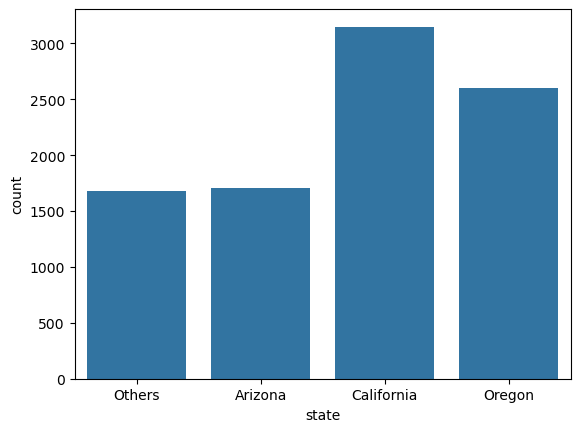

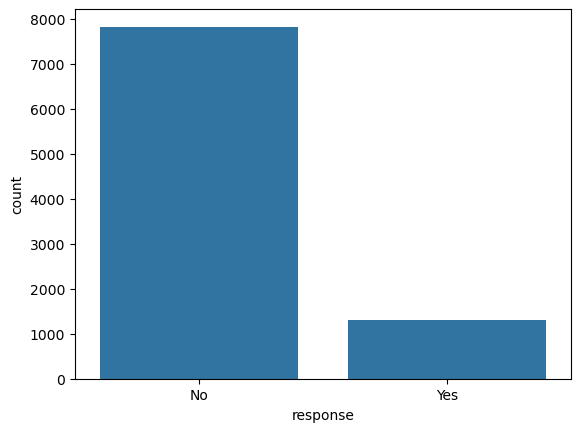

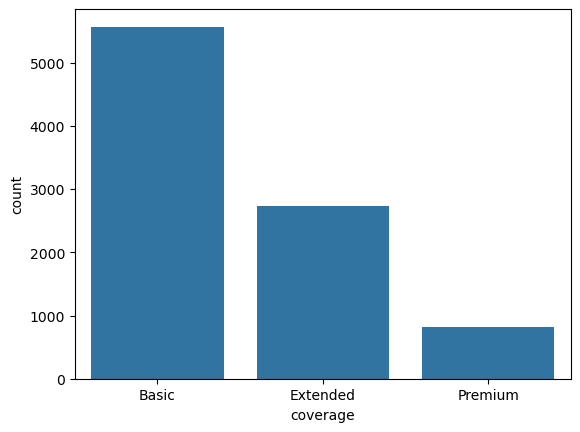

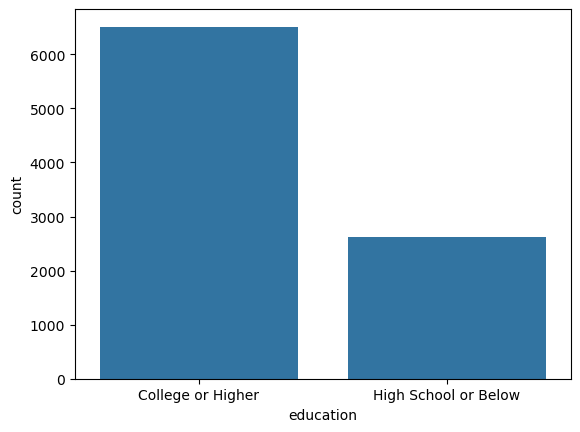

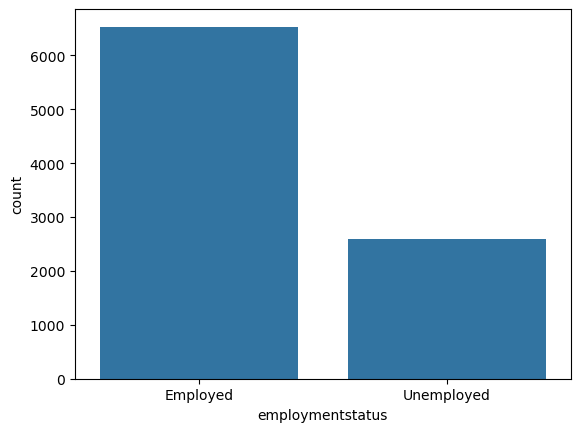

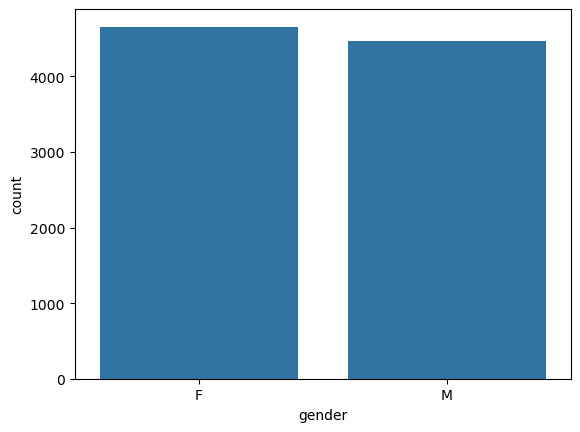

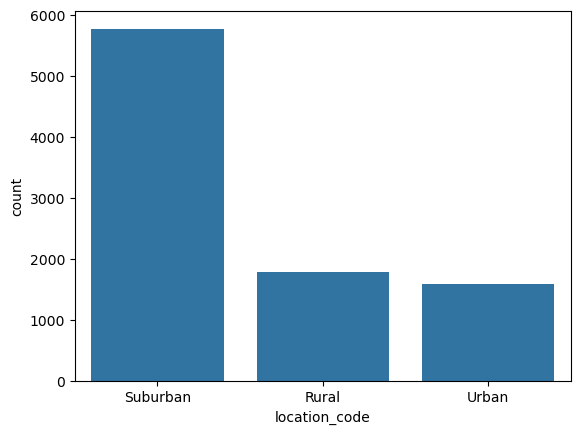

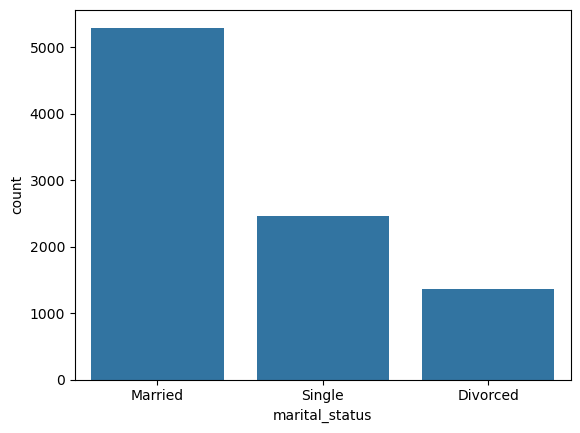

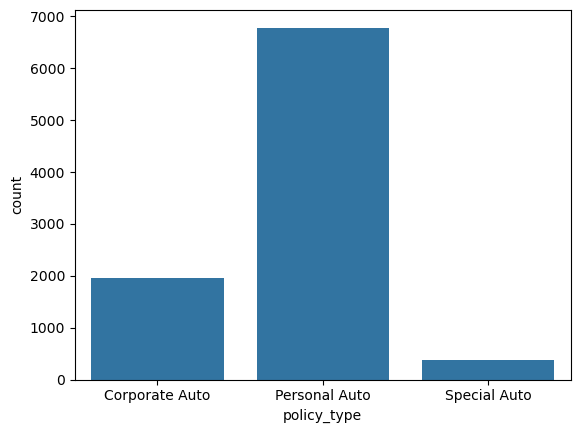

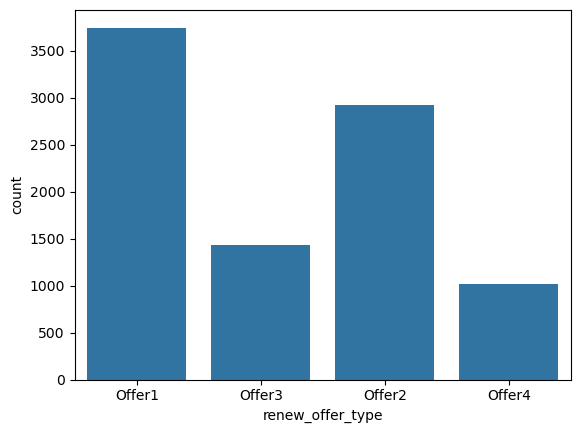

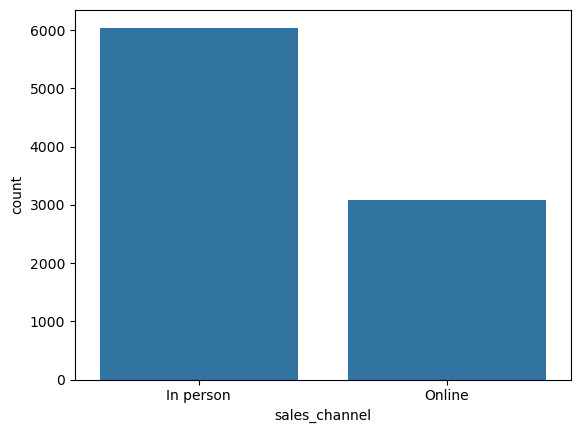

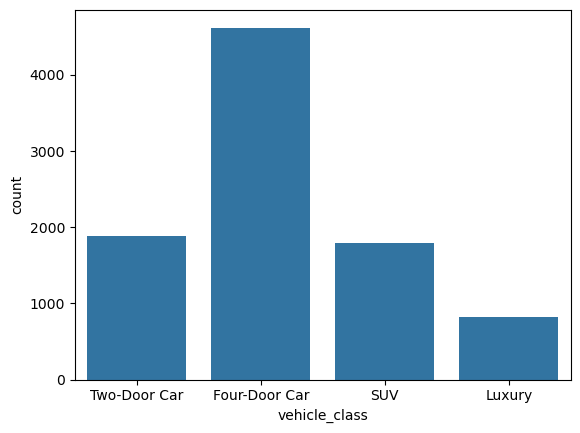

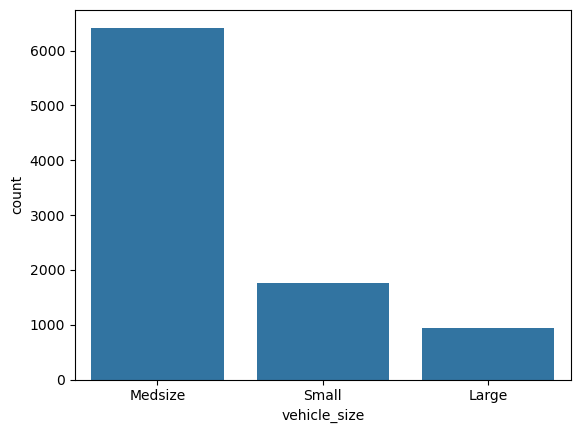

In [34]:
for columns in categorical_df:
    sns.countplot(x=categorical_df[columns], data=categorical_df)
    plt.show()

#From the distribution of the values we can see that the majority of customers:
    #reside in California or Oregon
    #do not respond
    #have a basic coverage insurance
    #have an education level of college or higher
    #are employed, are married and live in a suburban area
    #are almost equally distributed between male and female (small majority of female customers)
    #have a personal auto policy type
    #benefit from offer 1 or 2 when they renew their contracts
    #have a medium size, four-door vehicle
    #sign their contract with an agent or the branch sales channel


3- There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
Make any changes you feel are necessary.

In [35]:
#For now, I don't feel that there is a need for changes in the data but it might be a point to change depending on the performance of our model

4- Plot time variable. Can you extract something from it?

<Axes: xlabel='effective_to_date', ylabel='count'>

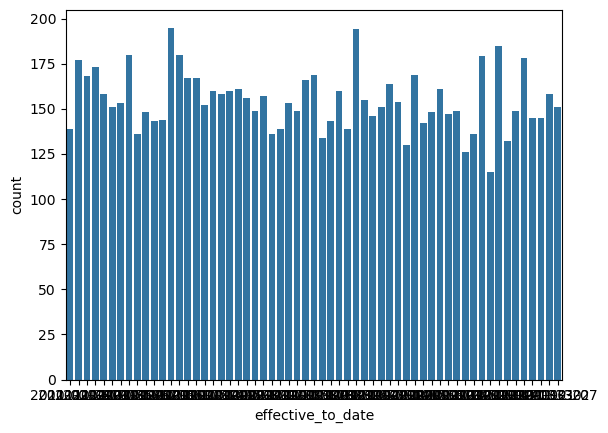

In [36]:
sns.countplot(x='effective_to_date', data=customer_df)
#aside form observing that the distribution seems pretty uniform we can nt get much information from this time variable
#it is difficult to read the data even when rotating the labels

5- The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

In [37]:
customer_df['day_of_week'] = customer_df['effective_to_date'].dt.weekday
customer_df

customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9124  LA72316  California             23405.987980       No     Basic   
9125  PK87824  California              3096.511217      Yes  Extended   
9126  TD14365  California              8163.890428       No  Extended   
9127  UP19263  California              7524.442436       No  Extended   
9128  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  \
0     Bachelor        2011-02-24         Employed      F   56274   
1     Bachelor        2011-01-31       Unemployed      F       0   
2     Bachelor        2011-02-19         Employed      F   48767   
3     Bachelor        2011-01-20       Unemployed      M       0   
4     Bachelor        2011-02-03         Employed      M   43836   
...        ...               ...              ...    ...     ...   
9124  Bachelor        2011-02-10         Employed      M   71941   
9125   College        2011-02-12         Employed      F   21604   
9126  Bachelor        2011-02-06       Unemployed      M       0   
9127   College        2011-02-03         Employed      M   21941   
9128   College        2011-02-14       Unemployed      M       0   

     location_code marital_status  monthly_premium_auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9124         Urban        Married                    73   
9125      Suburban       Divorced                    79   
9126      Suburban         Single                    85   
9127      Suburban        Married                    96   
9128      Suburban         Single                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9124                       18                             89   
9125                       14                             28   
9126                        9                             37   
9127                       34                              3   
9128                        3                             90   

      number_of_open_complaints  number_of_policies     policy_type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9124                          0                   2   Personal Auto   
9125                          0                   1  Corporate Auto   
9126                          3                   2  Corporate Auto   
9127                          0                   3   Personal Auto   
9128                          0                   1 

In [38]:
customer_df['week'] = customer_df['effective_to_date'].dt.isocalendar().week
customer_df

customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9124  LA72316  California             23405.987980       No     Basic   
9125  PK87824  California              3096.511217      Yes  Extended   
9126  TD14365  California              8163.890428       No  Extended   
9127  UP19263  California              7524.442436       No  Extended   
9128  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  \
0     Bachelor        2011-02-24         Employed      F   56274   
1     Bachelor        2011-01-31       Unemployed      F       0   
2     Bachelor        2011-02-19         Employed      F   48767   
3     Bachelor        2011-01-20       Unemployed      M       0   
4     Bachelor        2011-02-03         Employed      M   43836   
...        ...               ...              ...    ...     ...   
9124  Bachelor        2011-02-10         Employed      M   71941   
9125   College        2011-02-12         Employed      F   21604   
9126  Bachelor        2011-02-06       Unemployed      M       0   
9127   College        2011-02-03         Employed      M   21941   
9128   College        2011-02-14       Unemployed      M       0   

     location_code marital_status  monthly_premium_auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9124         Urban        Married                    73   
9125      Suburban       Divorced                    79   
9126      Suburban         Single                    85   
9127      Suburban        Married                    96   
9128      Suburban         Single                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9124                       18                             89   
9125                       14                             28   
9126                        9                             37   
9127                       34                              3   
9128                        3                             90   

      number_of_open_complaints  number_of_policies     policy_type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9124                          0                   2   Personal Auto   
9125                          0                   1  Corporate Auto   
9126                          3                   2  Corporate Auto   
9127                          0                   3   Personal Auto   
9128                          0                   1 

In [39]:
customer_df['month'] = customer_df['effective_to_date'].dt.month
customer_df

customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9124  LA72316  California             23405.987980       No     Basic   
9125  PK87824  California              3096.511217      Yes  Extended   
9126  TD14365  California              8163.890428       No  Extended   
9127  UP19263  California              7524.442436       No  Extended   
9128  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  \
0     Bachelor        2011-02-24         Employed      F   56274   
1     Bachelor        2011-01-31       Unemployed      F       0   
2     Bachelor        2011-02-19         Employed      F   48767   
3     Bachelor        2011-01-20       Unemployed      M       0   
4     Bachelor        2011-02-03         Employed      M   43836   
...        ...               ...              ...    ...     ...   
9124  Bachelor        2011-02-10         Employed      M   71941   
9125   College        2011-02-12         Employed      F   21604   
9126  Bachelor        2011-02-06       Unemployed      M       0   
9127   College        2011-02-03         Employed      M   21941   
9128   College        2011-02-14       Unemployed      M       0   

     location_code marital_status  monthly_premium_auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9124         Urban        Married                    73   
9125      Suburban       Divorced                    79   
9126      Suburban         Single                    85   
9127      Suburban        Married                    96   
9128      Suburban         Single                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9124                       18                             89   
9125                       14                             28   
9126                        9                             37   
9127                       34                              3   
9128                        3                             90   

      number_of_open_complaints  number_of_policies     policy_type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9124                          0                   2   Personal Auto   
9125                          0                   1  Corporate Auto   
9126                          3                   2  Corporate Auto   
9127                          0                   3   Personal Auto   
9128                          0                   1 

In [40]:
print(customer_df['day_of_week'].value_counts(dropna=False))
print('')

print(customer_df['week'].value_counts(dropna=False))
print('')

print(customer_df['month'].value_counts(dropna=False))
print('')

day_of_week
0    1528
5    1397
6    1330
3    1249
4    1245
2    1219
1    1161
Name: count, dtype: int64

week
4       1146
3       1136
5       1104
2       1079
8       1073
1       1049
7       1039
6       1034
52       308
9        161
<NA>       0
Name: count, dtype: Int64

month
1    4895
2    4234
Name: count, dtype: int64



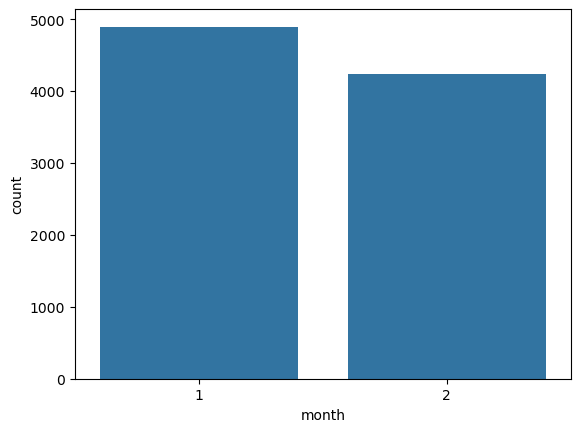

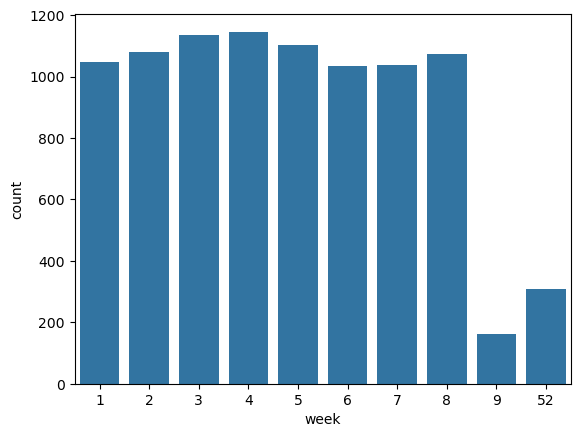

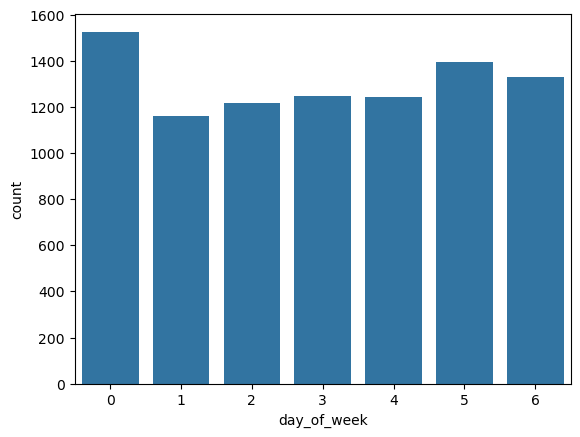

In [41]:
sns.countplot(x='month', data=customer_df)
plt.show()

sns.countplot(x='week', data=customer_df)
plt.show()

sns.countplot(x='day_of_week', data=customer_df)
plt.show()

#most noticeable difference is between weeks but there must be some kind of error since all the contract would be effective in either January or February
#and there is no week 52 in those months
# it seems like a majority of contract begin on monday (day 0) and in January (month 1)
#to use this time variable we could probably reduce it to just the month when the contract is effective (either 1 or 2)

In [42]:
#I'll add the month column to the categorical dataframe to include the date variable in my analysis
categorical_df['effective_to_month']= customer_df['month']
categorical_df

state response  coverage          education employmentstatus  \
0         Others       No     Basic  College or Higher         Employed   
1        Arizona       No  Extended  College or Higher       Unemployed   
2         Others       No   Premium  College or Higher         Employed   
3     California       No     Basic  College or Higher       Unemployed   
4         Others       No     Basic  College or Higher         Employed   
...          ...      ...       ...                ...              ...   
9124  California       No     Basic  College or Higher         Employed   
9125  California      Yes  Extended  College or Higher         Employed   
9126  California       No  Extended  College or Higher       Unemployed   
9127  California       No  Extended  College or Higher         Employed   
9128  California       No  Extended  College or Higher       Unemployed   

     gender location_code marital_status     policy_type renew_offer_type  \
0         F      Suburban        Married  Corporate Auto           Offer1   
1         F      Suburban         Single   Personal Auto           Offer3   
2         F      Suburban        Married   Personal Auto           Offer1   
3         M      Suburban        Married  Corporate Auto           Offer1   
4         M         Rural         Single   Personal Auto           Offer1   
...     ...           ...            ...             ...              ...   
9124      M         Urban        Married   Personal Auto           Offer2   
9125      F      Suburban       Divorced  Corporate Auto           Offer1   
9126      M      Suburban         Single  Corporate Auto           Offer1   
9127      M      Suburban        Married   Personal Auto           Offer3   
9128      M      Suburban         Single  Corporate Auto           Offer4   

     sales_channel  vehicle_class vehicle_size  effective_to_month  
0        In person   Two-Door Car      Medsize                   2  
1        In person  Four-Door Car      Medsize                   1  
2        In person   Two-Door Car      Medsize                   2  
3           Online            SUV      Medsize                   1  
4        In person  Four-Door Car      Medsize                   2  
...            ...            ...          ...                 ...  
9124        Online  Four-Door Car      Medsize                   2  
9125     In person  Four-Door Car      Medsize                   2  
9126     In person  Four-Door Car      Medsize                   2  
9127     In person  Four-Door Car        Large                   2  
9128        Online   Two-Door Car      Medsize                   2  

[9129 rows x 14 columns]